## POD/PCA dimensionality reduction

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive/')

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


In [ ]:
import sys
sys.path.append('/content/gdrive/MyDrive/ACSE-9')

In [ ]:
# Imports
from numpy import *
from math  import *
import sys, os
import numpy as np
!pip install vtk -q
import vtk
import vtktools
import matplotlib.pyplot as plt
import datetime, time

import pprint as pprint

     |████████████████████████████████| 59.5 MB 54 kB/s 
     |████████████████████████████████| 495 kB 68.2 MB/s 
     |████████████████████████████████| 3.1 MB 59.5 MB/s 
     |████████████████████████████████| 3.0 MB 34.5 MB/s 
     |████████████████████████████████| 74 kB 3.2 MB/s 
     |████████████████████████████████| 251 kB 56.9 MB/s 
     |████████████████████████████████| 1.3 MB 69.5 MB/s 
     |████████████████████████████████| 294 kB 73.5 MB/s 
     |████████████████████████████████| 142 kB 69.6 MB/s 


In [ ]:
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# TensorFlow ≥2.0 is required
import tensorflow as tf
from tensorflow import keras
assert tf.__version__ >= "2.0"

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

import pandas as pd
import joblib

### Find the number of components to reduce to for PCA
Principle Component Analysis extracts the components which are representitive of the variance of the data e.g. for $p_1, p_2, ... p_n$. </br>
$p_1$ explains the most significant variance and $p_n$ represents the smallest for some integer $n$.

Below we want approximately 99.5% of the explained variance to be represented by principle components. 

First plot to find the explained variance distribution for all the data. $p_{tot}$ cannot be set to $1.0$, therefore, $p_{tot} = 0.9999999999999995$.

In [ ]:
# Load matrix
all_values = joblib.load('/content/gdrive/MyDrive/ACSE-9/output_pod_files/snapshot_matrix_410.pkl') 

In [ ]:
all_values.shape

(410, 595624)

In [ ]:
from sklearn.decomposition import PCA
'''
  p_tot is the proportion of the variance we want to check against
'''

p_tot = 0.9999999999999995
# # Create an instance of the PCA model
pca = PCA(p_tot)
train_pca = pca.fit_transform(all_values)
# In this case np.allclose == True because have not yet reduced the dimensionality
X_recovered = pca.inverse_transform(train_pca)
np.allclose(X_recovered, all_values)

True

In [ ]:
all_values

array([[ 1.        ,  1.        ,  1.        , ...,  0.58938422,
        -0.10946988, -0.10174592],
       [ 0.97360818,  0.98210026,  0.96064208, ..., -0.50187646,
         0.89386907,  1.        ],
       [ 0.63525847, -0.1372478 , -0.38702153, ..., -0.45218777,
         0.57175512,  0.62440241],
       ...,
       [-0.99976513, -0.99991271, -0.99938171, ...,  0.70392922,
        -0.12285544, -0.12074436],
       [-0.99974408, -0.99990316, -0.9993286 , ...,  0.54013904,
        -0.24523432, -0.23086515],
       [-0.99972373, -0.99989336, -0.9992791 , ...,  0.53738397,
        -0.2578244 , -0.23995282]])

In [ ]:
# Number of components the pca results in is for almost 1.0 variance -> close to 410 as expected
pca.n_components_

406

In [ ]:
# explained variance of the first 10 components
pca.explained_variance_ratio_[:10].sum()

0.931231136888672

In [ ]:
pca.singular_values_[:5]

array([3838.78898894, 2945.06525071, 1549.37533095, 1307.73101925,
        907.46217335])

In [ ]:
# shape is the same as before
train_pca.shape

(410, 406)

In [ ]:
'''
  Finding the cumulative sum of the explained variance ratio to plot
  & Determining the number of components which explains 99.5% cumulative variance
'''
p = 0.995
cumsum_eig = np.cumsum(pca.explained_variance_ratio_)
d_tot = pca.n_components_
# Find the number of principle components 
d = np.argmax(cumsum_eig >= p) + 1
print("initial number of components = ", d_tot)
print("number of components after PCA = ", d)

initial number of components =  406
number of components after PCA =  43


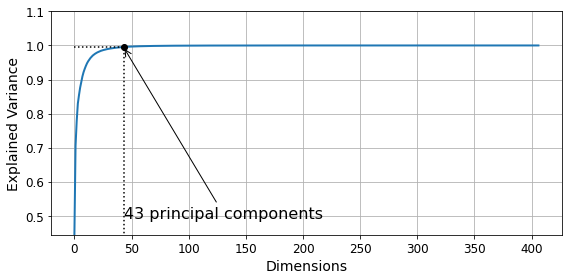

In [ ]:
'''
  Plot of explained variance against dimensions
'''
x_dims = np.linspace(0, d_tot, d_tot)
plt.figure(figsize=(8,4))
plt.plot(x_dims, cumsum_eig, linewidth=2)
plt.xlabel("Dimensions")
plt.ylabel("Explained Variance")
plt.ylim([cumsum_eig[0],1.1])
plt.plot([d, d], [0, p], "k:")
plt.plot([0, d], [p, p], "k:")
plt.plot(d, p, "ko")
plt.annotate("43 principal components", xy=(d, p), xytext=(d, cumsum_eig[0]+0.05),
             arrowprops=dict(arrowstyle="->"), fontsize=16)
plt.grid(True)
plt.tight_layout()
plt.savefig('/content/gdrive/MyDrive/ACSE-9/Scripts_final/Results_figures/POD_43.pdf', bbox_inches='tight')

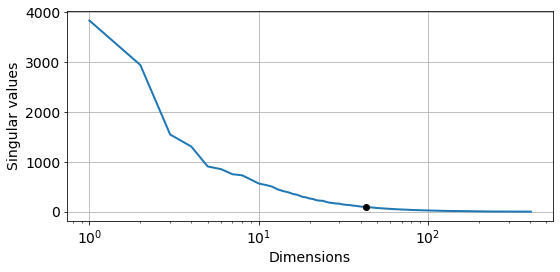

In [ ]:
'''
  Plot of singular value decay in a linear scale
'''
mpl.rcParams.update({'font.size': 14})
mpl.rc('xtick', labelsize=14) 
mpl.rc('ytick', labelsize=14) 
mpl.rc('axes', labelsize=14)

fig, ax = plt.subplots(1,1,figsize=(8,4))
ax.plot(range(1,len(pca.singular_values_)+1), pca.singular_values_, linewidth=2)
ax.set_xlabel("Dimensions")
ax.set_ylabel("Singular values")
ax.set_xscale('log')
ax.plot(d, pca.singular_values_[d-1], "ko")

plt.grid()
plt.tight_layout()
plt.savefig('/content/gdrive/MyDrive/ACSE-9/Scripts_final/Results_figures/singular_vals_linear.pdf', bbox_inches='tight')

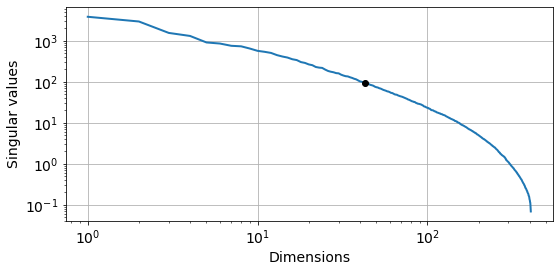

In [ ]:
'''
  Plot of singular value decay in a logarithmic scale
'''
mpl.rcParams.update({'font.size': 14})
mpl.rc('xtick', labelsize=14) 
mpl.rc('ytick', labelsize=14) 
mpl.rc('axes', labelsize=14)

fig, ax = plt.subplots(1,1,figsize=(8,4))
ax.plot(range(1,len(pca.singular_values_)+1), pca.singular_values_, linewidth=2)
ax.set_xlabel("Dimensions")
ax.set_ylabel("Singular values")
ax.set_xscale('log')
ax.set_yscale('log') 

ax.plot(d, pca.singular_values_[d-1], "ko")

plt.grid()
plt.tight_layout()
plt.savefig('/content/gdrive/MyDrive/ACSE-9/Scripts_final/Results_figures/singular_vals_log.pdf', bbox_inches='tight')

# Apply PCA to the Data

Bring the number of components down to 43 as shown previously to represent 99.55% of the data. In this case `np.allclose(X_recovered, all_values) == False` since have now reduced the dimensionality of the data.

In [ ]:
pca_compress = PCA(n_components=d)
X_train_pca = pca_compress.fit_transform(all_values)
X_recovered = pca_compress.inverse_transform(X_train_pca)
print(np.allclose(X_recovered, all_values))
X_train_pca.shape

False


(410, 43)

### Output the PCA/POD coefficients to a `.pkl` file 

(array([5.1000e+01, 1.1100e+02, 3.8600e+02, 1.3049e+04, 3.6190e+03,
        2.2800e+02, 8.2000e+01, 8.8000e+01, 9.0000e+00, 7.0000e+00]),
 array([-303.04085148, -225.22171073, -147.40256997,  -69.58342922,
           8.23571153,   86.05485228,  163.87399303,  241.69313379,
         319.51227454,  397.33141529,  475.15055604]),
 <a list of 10 Patch objects>)

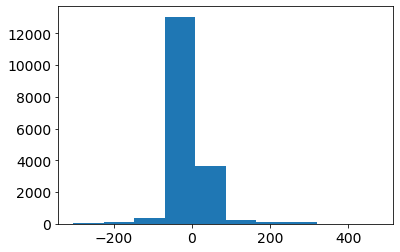

In [ ]:
plt.hist(X_train_pca.flatten())

In [ ]:
import joblib
joblib.dump(X_train_pca, '/content/gdrive/MyDrive/ACSE-9/output_pod_files/pod_coefficients_410.pkl') 
joblib.dump(all_values, '/content/gdrive/MyDrive/ACSE-9/output_pod_files/X_train_1D_410.pkl')
joblib.dump(pca_compress, '/content/gdrive/MyDrive/ACSE-9/output_pod_files/pca_compress_410.pkl')

['/content/gdrive/MyDrive/ACSE-9/output_pod_files/pca_compress_410.pkl']

In [ ]:
# optimisation of test of file saving & reading test
# t1 = time.time()
# test1 = np.loadtxt('/content/gdrive/MyDrive/ACSE-9/output_pod_files/X_train_1D_full.csv', delimiter=',')
# t2 = time.time()
# test2 = joblib.load('/content/gdrive/MyDrive/ACSE-9/output_pod_files/X_train_1D_full_test.pkl')
# t3 = time.time()

# print(".csv file save time: ", t2-t1)
# print(".pkl file save time: ", t3-t1)

# print(np.allclose(test1, test2))